<a href="https://colab.research.google.com/github/putrilestari434/PraktikumKecerdasanBuatan/blob/main/praktikum2_G_211_22_0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# support Vector Machine
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (1).csv
Saving Data.csv to Data (1).csv


<ipython-input-85-4060bf2a958a>:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


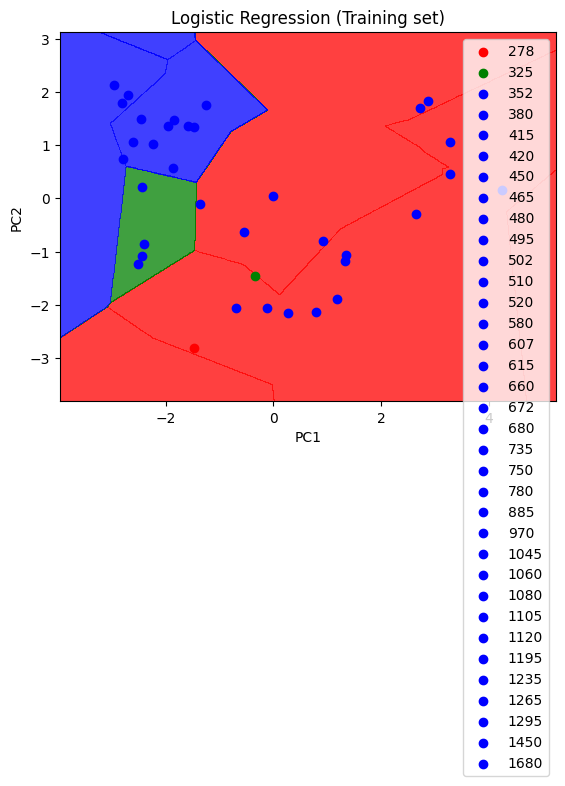

In [85]:
#Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Mengimpor datasetnya
dataset = pd.read_csv('wine.csv')
X= dataset.iloc[:, 0:13].values
y= dataset.iloc[:, 13].values

#Membagi data ke dalam Training set dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Proses Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Menjalankan algoritma PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance = pca.explained_variance_ratio_ # Proses pengecekan variance

#Proses pemilihan PCs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance2 = pca.explained_variance_ratio_

#Menjalankan algoritma logistic regression ke training set
from sklearn.linear_model import LogisticRegression
mesin_klasifikasi = LogisticRegression(random_state = 0)
mesin_klasifikasi.fit(X_train, y_train)

#Memprediksi test set berdasakan model logistic regression
y_pred = mesin_klasifikasi.predict(X_test)

#Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Visualisasi Training Set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [99]:
# Import Librari
import pandas as pd
import numpy as np
import random
import operator
import math

# reading the input csv file
df_full = pd.read_csv("Data.csv")
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

# Jumlah atribut
num_attr = len(df.columns) -1
k = 2
MAX_ITER = 100
n = len(df)
m = 2.00

# fungsi akurasi untuk menghitung akurasi dari hasil

def accuracy(cluster_labels, class_labels):
    county = [0,0]
    countn = [0,0]
    tp = [0, 0]
    tn = [0, 0]
    fp = [0, 0]
    fn = [0, 0]

    for i in range(len(df)):
        #Yes = 1, No = 0
        if cluster_labels[i] == 1 and class_labels[i] == 'Yes':
          tp[0] = tp[0] + 1
        if cluster_labels[i] == 0 and class_labels[i] == 'No':
          tn[0] = tn[0] + 1
        if cluster_labels[i] == 1 and class_labels[i] == 'No':
          fp[0]= fp[0] + 1
        if cluster_labels[i] == 0 and class_labels[i] == 'Yes':
          fn[0]= fn[0] + 1
    for i in range(len(df)):

        # Yes = 0, No = 1
        if cluster_labels[i] == 0 and class_labels[i] == 'Yes':
          tp[1] = tp[1] + 1
        if cluster_labels[i] == 1 and class_labels[i] == 'No':
          tn[1] = tn[1] + 1
        if cluster_labels[i] == 0 and class_labels[i] == 'No':
          fp[1] = fp[1] +1
        if cluster_labels[i] == 1 and class_labels[i] == 'Yes':
          fn[1] = fn[1] + 1

    a0 = float((tp[0] + tn[0]))/(tp[0] + tn[0] + fn[0] + fp[0])
    a1 = float((tp[1] + tn[1]))/(tp[1] + tn[1] + fn[1] + fp[1])
    p0 = float(tp[0])/(tp[0] + fp[0])
    p1 = float(tp[1])/(tp[1] + fp[1])
    r0 = float(tp[0])/(tp[0] + fn[0])
    r1 = float(tp[1])/(tp[1] + fn[1])

    accuracy = [a0*100, a1*100]
    precision = [p0*100,p1*100]
    recall = [r0*100, r1*100]

    return accuracy, precision, recall

### Inisialisasi jumlah matriks dengan random values
def initializeMembershipMatrix():
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    return membership_mat

### Menghitung pusat cluster dengan setiap interasi
def calculateClusterCenter(membership_mat):
    cluster_mem_val = zip(*membership_mat)
    cluster_centers = list()
    for j in range(k):
        x = list(zip(*membership_mat))[j]
        xraised = [e ** m for e in x]
        denominator = sum(xraised)
        temp_num = list()
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

### Update nilai anggota dengan pusat cluster

def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

### Final fungsi FCM
def fuzzyCMeansClustering():
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr <= MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1

    print(membership_mat)
    return cluster_labels, cluster_centers

### Memanggil fungsi utama dan mengirimkan hasil akhir dalam label dan pusat cluster
print("printing the final membership matrix")
labels, centers = fuzzyCMeansClustering()
print("printing cluster centers")
print(centers)

### measuring the accuracy of the result
a,p,r = accuracy(labels, class_labels)

### printing the values
print("Accuracy = " + str(a))
print("Precision = " + str(p))
print("Recall = " + str(r))

printing the final membership matrix
[[0.4980893134528766, 0.5019106865471235], [0.5010862384784577, 0.49891376152154226], [0.5001732425926745, 0.49982675740732546], [0.5012154575762182, 0.49878454242378184], [0.4991174571796375, 0.5008825428203624], [0.4975967475005981, 0.5024032524994019], [0.49859785776105775, 0.5014021422389423], [0.498137574725485, 0.501862425274515], [0.49938459155434, 0.50061540844566], [0.49746608828856204, 0.5025339117114379], [0.4986460126549274, 0.5013539873450726], [0.498815412492434, 0.501184587507566], [0.5004130685506558, 0.49958693144934424], [0.4982214043947167, 0.5017785956052833], [0.49803100333778844, 0.5019689966622116], [0.49891789855402624, 0.5010821014459738], [0.4972776961397857, 0.5027223038602143], [0.49929728007641766, 0.5007027199235824], [0.49952886341400327, 0.5004711365859967], [0.5019193736878765, 0.49808062631212335], [0.49794746238066895, 0.5020525376193311], [0.4977594745709129, 0.5022405254290871], [0.5017778459311067, 0.49822215406